# Python

### Python deps and reading data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("recent-grads.csv") # side note: entering direct raw github url resulted in some parser error.
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### What categories of majors make more money than others?

### What are the highest earning majors?

# R

### R deps and reading data

In [28]:
library(tidyverse)
library(scales)
recent_grads <- read_csv("recent-grads.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  Major = col_character(),
  Major_category = col_character(),
  ShareWomen = col_double(),
  Unemployment_rate = col_double()
)
See spec(...) for full column specifications.


In [29]:
head(recent_grads)

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.1449670,17,1857,⋯,264,1449,400,0.17722641,65000,50000,102000,1142,657,244


### What categories of majors make more money than others?

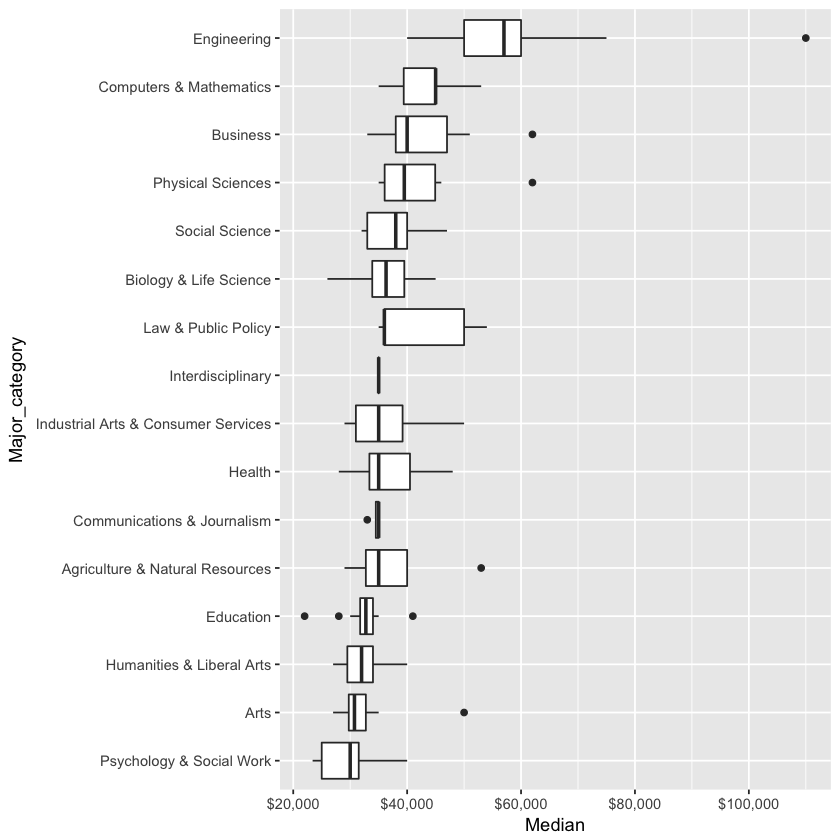

In [55]:
# visualize the distribution of salary for each major using boxplot
recent_grads %>%
    # reorder Major_category according to the Median (top -> highest salary)
    mutate(Major_category = fct_reorder(Major_category, Median)) %>%
    # Major_category as X, Median as y
    ggplot(aes(Major_category, Median)) +
    geom_boxplot() +
    # reformats the Median (y) as currency in $
    scale_y_continuous(labels = dollar_format()) +
    # since it's hard to read the labels for x axis, flip coords
    coord_flip()

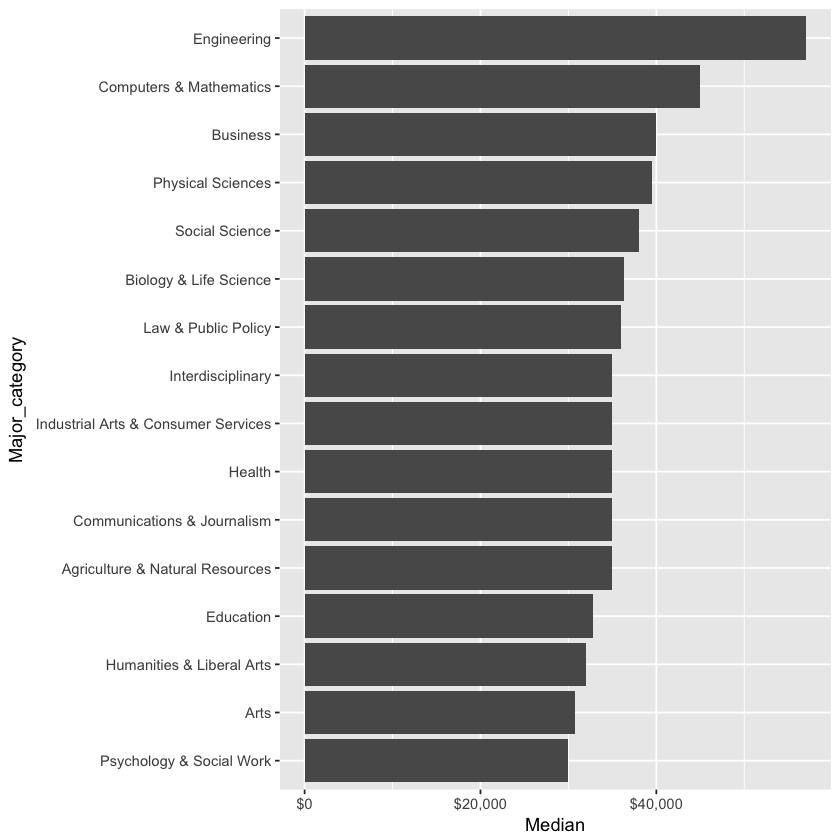

In [56]:
# visualize the distribution of salary for each major using bar
recent_grads %>%
    group_by(Major_category) %>%
    summarize(Median = median(Median)) %>%
    mutate(Major_category = fct_reorder(Major_category, Median)) %>%
    ggplot(aes(Major_category, Median)) +
    geom_col() +
    scale_y_continuous(labels = dollar_format()) +
    coord_flip()

### What are the highest earning majors?

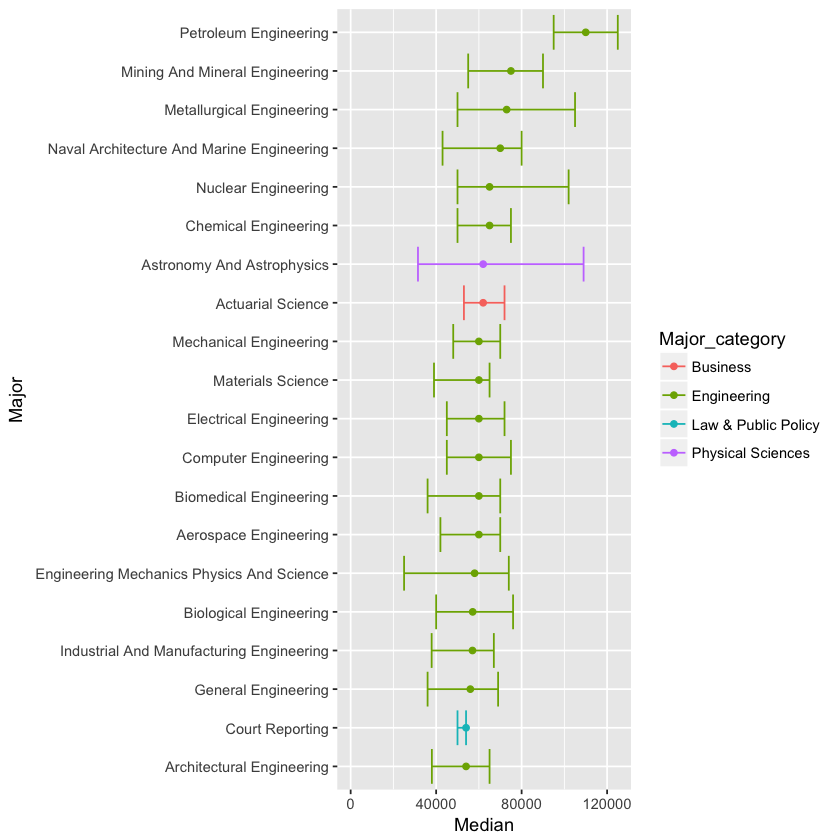

In [82]:
recent_grads %>%
    arrange(desc(Median)) %>%
    select(Major, Major_category, Median, P25th, P75th) %>%
    head(20) %>%
    mutate(Major = str_to_title(Major), # change all caps to 
        Major = fct_reorder(Major, Median)) %>%
    ggplot(aes(Major, Median, color=Major_category)) +
    geom_point() + 
    # show intervals (range of salaries)
    geom_errorbar(aes(ymin = P25th, ymax = P75th)) +
    # geom_point doesn't start at 0 whereas geom_col does
    # so need to expand scale to start from 0
    expand_limits(y = 0) + 
    coord_flip()